In [106]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [107]:
tpa = np.array([0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
theta = 2 * np.pi * np.linspace(0., 1., 12, endpoint=False)

In [129]:
pulse = np.random.normal(0, scale=tpa.reshape(len(tpa),1), size=(len(tpa), 512))

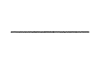

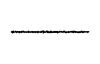

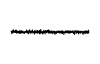

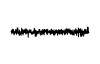

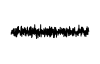

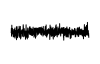

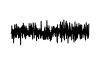

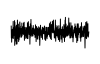

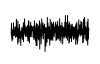

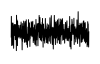

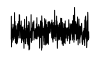

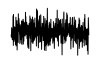

In [206]:
for i,t in enumerate(tpa):
    plt.figure(figsize=(1.5,1.), dpi=300)
    plt.plot(pulse[i], color='black', linewidth=1.)
    plt.axis('off')
    plt.ylim(-30,30)
    plt.tight_layout()
    plt.savefig('data_for_circular/mock_pulse_{}.svg'.format(i))
    plt.show()

In [179]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib import image

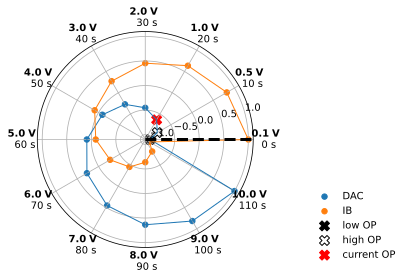

In [217]:
data = np.linspace(-1, 1, len(tpa))

r = np.linspace(-1., 1, 12)
theta = 2 * np.pi * np.linspace(0., 1., 12, endpoint=False)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,4), dpi=300)

# sep cycle line
ax.plot([0,0], [-1.1,1.1], color='black', linestyle='dashed', linewidth=3, zorder=100)

# DAC
ax.plot(np.concatenate((theta,[theta[0]])), np.concatenate((data,[data[0]])), linewidth=1.)
ax.scatter(theta, data, s=30, label='DAC')

# IB
ax.plot(np.concatenate((theta,[theta[0]])), np.concatenate((np.flip(data),[data[-1]])), linewidth=1.)
ax.scatter(theta, np.flip(data), s=30, label='IB')

ax.set_rticks([-1, -.5, 0., .5, 1,])  # Less radial ticks
ax.set_rlabel_position(15.)
ax.set_thetagrids(theta/2 / np.pi*360, [ r'$\bf{' + str(t) + ' \; V }$ \n ' + str(i*10) + ' s' for i,t in enumerate(tpa)])
ax.grid(True)
ax.set_rlim(-1.1, 1.1)

# the pulses

# for i in range(12):
#     pulse_img = image.imread('data_for_circular/mock_pulse_{}.png'.format(i)) 
#     imagebox = OffsetImage(pulse_img, zoom = 0.2)#Annotation box for solar pv logo
#     ab = AnnotationBbox(imagebox, (i*2*np.pi/11, 1.1), frameon = False)
#     ax.add_artist(ab)

ax.scatter(theta[0], data[0], color='black', edgecolor='black', s=100, marker='X', label='low OP')
ax.scatter(theta[1], data[1], color='white', edgecolor='black', s=100, marker='X', label='high OP')
ax.scatter(theta[2], data[2], color='red', s=100, marker='X', label='current OP')
    
plt.legend(bbox_to_anchor=(1.7, 0.3), frameon=False)
plt.tight_layout()
plt.savefig('data_for_circular/circular.svg')
plt.show()